# Tutorial 4 - Pressure vs Temperature

Surfinpy also has the functionality to generate phase diagrams as a function of pressure vs temperature based upon the methodology used in Molinari et al. (J. Phys. Chem. C  116, 12, 7073-7082). 

\begin{align}
\gamma_{adsorbed, T, p} & = \gamma_{bare} + (C(E_{ads, T} - RTln(\frac{p}{p^o})
\end{align}

where $\gamma_{adsorbed, T, p}$ is the surface energy of the surface with adsorbed species at a given temperature and pressure, $\gamma_{bare}$ is the suface energy of the bare surface, C is the coverage of adsorbed species, $E_{ads}$ is the adsorptin energy, 

\begin{align}
E_{ads, T} & =  E_{slab, adsorbant} - (E_{slab, bare} + n_{H_2O} E_{H_2O, T}) / n_{H_2O}
\end{align}

where $E_{slab, adsorbant}$ is the energy of the surface and the adsorbed species, $n_{H_2O}$ is he number of adsorbed species, 

\begin{align}
E_{H_2O, (T)} & = E_{H_2O, (g)} - TS_{(T)}
\end{align}

where $S_{(T)}$ is the experimental entropy of gaseous water in the standard state.

So let's look at this in action. The module used is called p_vs_t

In [1]:
import sys
import numpy as np
sys.path.append('../surfinpy/')
import p_vs_t as pt
import phaseplot as pp

There are a number of user inputs that are required, the inputs are similiar to mu_vs_mu but with some small differences. First we need the energy from DFT of the adsorbant

In [2]:
adsorbant = -21.55846785

the energy of the surface in $j_m^2$

In [3]:
SE = 1.44

the data for each surface

In [4]:
stoich = {'M': 24, 'X': 48, 'Y': 0, 'Area': 60.22, 'Energy': -535.660075, 'Label': '0.00 - $Ce^{4+}$'}
H2O = {'M': 24, 'X': 48, 'Y': 2, 'Area': 60.22, 'Energy': -621.877140,  'Label': '1.66 - $Ce^{4+}$'}
H2O_2 = {'M': 24, 'X': 48, 'Y': 4, 'Area': 60.22, 'Energy': -670.229520, 'Label': '3.32 - $Ce^{4+}$'}
data = [H2O, H2O_2]

the coverages

In [5]:
coverage = np.array([(1.66 * 10**18), (3.32 * 10**18)])

and the thermochemical data for the adsorbed species. This data has been taken directly from the NIST Janaf database and has been cut to just include the temperature and S values within the temperature range that interests us. 

In [6]:
thermochem = np.genfromtxt('Free_energy.txt', dtype=float)

Now we can calculate our phase diagram and plot it. 

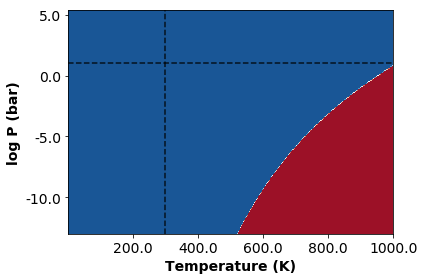

In [7]:
x, y, z = pt.calculate(stoich, data, SE, adsorbant, coverage, thermochem)

pp.tvp_plot(x, y, z, "Test.png")